# Deep Learning for the Geosciences (Technion 16837)

## Assignment #2c: Support Vector Machine

In [3]:
import numpy as np # Importing the numpy package to perform calculations
import matplotlib.pyplot as plt # Importing the pyplot package to plot data
import pandas as pd
import sys

%matplotlib inline

# Import local files
sys.path.append('code')
from utils import *
from hinge_loss_derivative import *
from gradient_descent import *

# Do not change below! Important for reloading code you write in external .py files.
%load_ext autoreload 
%autoreload 2 

---
## <ins>Note about chatGPT </ins>
As always, you may use chatGPT to complete your assignments, if you indicate you did. However, since our goal here is not only to get a good grade - but also to learn something - I recommend that you first attempt to solve the assignment yourself and only then look at what ChatGPT has to offer. 

When choosing to use ChatGPT:
1. Please write your input prompt.
2. Try to understand the code instead of just copying it.
3. Explain the code in words. What does each line do? What is the expected input and output?

Important note: Failing to disclose the use of ChatGPT or similar AI tools in an assignment may lead to the loss of all points for the assignment.

---

# 1. <ins>Download the dataset</ins>

## <ins>Instructions for Downloading CIFAR-10 Dataset Using PyTorch</ins>
Use the same method you used in the Regression notebook to download the CIFAR-10 data.

In [7]:
data_dir = './data/'

# CIFAR-10 class labels for readability
label_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Assuming the load_training_data function is defined to load and preprocess CIFAR-10 data
X_train, y_train = load_training_data(data_dir)

# Validate the loaded data by printing their shapes
print(f"Shape of X_train: {X_train.shape}")  # Expected to be (50000, 32, 32, 3) for CIFAR-10
print(f"Shape of y_train: {y_train.shape}")  # Expected to be (50000,) for CIFAR-10

# Preprocess and reshape the training data to fit the linear model
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten the images
y_train_flat = y_train  # y_train is already suitable for regression

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000,)


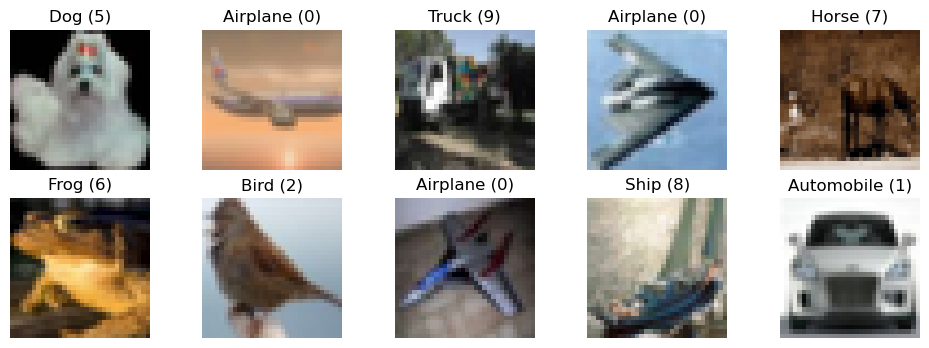

In [8]:
# Display 10 randomly selected images with label names
plt.figure(figsize=(12, 4))
indices = np.random.choice(len(X_train), 10, replace=False)
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[idx])
    plt.title(f"{label_names[y_train[idx]]} ({y_train[idx]})")
    plt.axis('off')
plt.show()

***
# 2. Binary Classification Using A Support Vector Machine (SVM)

2a. In class we saw that the hinge loss function, commonly used in support vector machines, for binary classification is:

$$ L(t, y) = \sum_i \max(0, 1 - t^{(i)} \cdot y^{(i)}) $$

Where $ y = Wx+b$ is a linear classifier and $t$ is the class label (-1 or 1). As we have seen in class, the rows of $W$, $w_i$, our "templates" for the classification.

In this assignment, you will use a support vector machine to classify images.

***
## <font color='lightgreen'>Answer the following question</font>
1. Can we optimize $L(t,y)$ analytically (compute the derivative of $L(t,y)$ and equate to $0$, and come up with a close-form solution) like we did for the regression loss function? If yes, compute the parameters. If not, why not? 
***

ניתן לגזור את הפונקציה אך לא ניתן למצוא את השורשים של הנגזרת (כלומר להשוות לאפס ולמצוא פתרון). לכן בשונה מהרגרסיה נצטרך לפתור את הבעיה בצורה נומרית.

### 2b. Write the partial derivative of $L$
Since the derivative of the hinge loss is piecewise, it is impossible to analytically differentiate it like in the case of linear regression. Instead, we will write code to differentiate the hinge loss function using the gradient descent algorithm we saw in class.

Start by writing a piecewise expression for the derivative of $L$ with respect to the parameters $w_i$:

$$\frac{\partial L}{\partial w_i} = ?$$

Next, use this expression to complete the code in file hinge_loss_derivative.py. The function should accept a numpy array of labels, $t$, as well as a matrix of data points, $X$, and the respective row of the matrix $W$, $w_i$, and return the value of the derivative $\frac{\partial L}{\partial w_i}$.

In [14]:
#

### 2c. Complete the code in file "grad_dec.py"
Implement the gradient descent algorithm we saw in class. 

Complete the code in grad_dec.py


# 3. Train your model

### 3a. Prepare your binary classifier
To use your binary classifier with CIFAR-10 which contains 10 classes, we will use the "one-vs-all" approach. For each class, we define a true label ("1") if an object belongs to the class, and a false label ("-1") if it belongs to any of the nine other classes.

In the following cells, you will implement the one-vs-all.

### 3b. Train your binary classifier

In [19]:
# 2. Train your model using T and the gradient descent function you have implemented
# a. In order to save time during training, use a parameter N: the number of samples to use from the dataset
# b. Store your weights in a matrix W like we saw in class, where each row corresponds to a template for a specific class

N = 100

# Placeholder for the optimized weights for each class
W = np.zeros((len(label_names), X_train_flat.shape[1]))

## YOUR CODE GOES HERE
for i in range(len(label_names)):
    Uesd_inx = np.random.choice(np.array(range(len(X_train_flat))), N)
    X = X_train_flat[Uesd_inx,:]
    t = np.copy(y_train_flat[Uesd_inx])
    t[t!=i] = -1
    t[t==i] = 1

    w, c = gradient_descent(X, t)
    W[i,:] = w
    print(c)
## YOUR CODE ENDS HERE

Training Complete
554
Training Complete
749
Training Complete
1000
Training Complete
599
Training Complete
1000
Training Complete
1000
Training Complete
1000
Training Complete
1000
Training Complete
832
Training Complete
944


### 3b. Visualize your weights

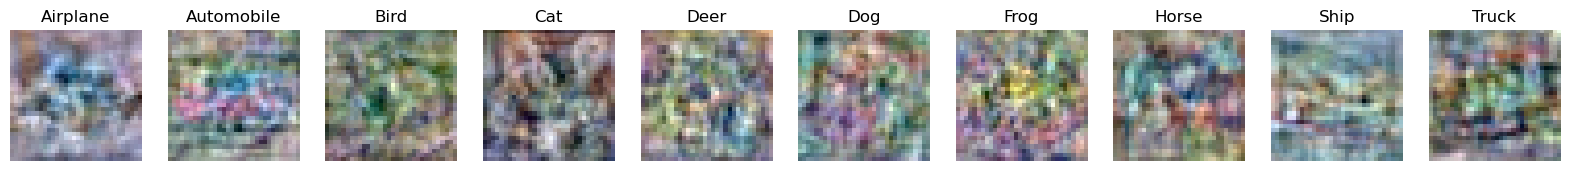

In [21]:
# Assuming W is your matrix of optimized weights
num_classes = len(label_names)
fig, axes = plt.subplots(1, num_classes, figsize=(20, 2))

for i in range(num_classes):
    # Reshape weights back into the original image size (32x32x3 for CIFAR-10)
    weight_img = W[i, :].reshape(32, 32, 3)
    
    # Normalize weight image to [0, 1] for visualization
    weight_img_normalized = (weight_img - weight_img.min()) / (weight_img.max() - weight_img.min())
    
    ax = axes[i]
    ax.imshow(weight_img_normalized, interpolation='nearest')
    ax.set_title(label_names[i])
    ax.axis('off')

plt.show()

***
## <font color='lightgreen'>Answer the following questions</font>
1. When visualizing the weights (templates) of your binary classifier minimized through the SVM hinge loss, what do you see? Refer and try to explain each filter: what is in the background? What is in the foreground? How do you think that helps the model "see"?
2. Try changing N to 1000, 5000 and 10000. What happens to the templates when you change N? What are the pros and cons of increasing N?
3. How do you suspect changing N will affect the accuracy of the classifier?
***

# 4. Test your model

In [24]:
# Load the test data (assuming you have a similar function or process as for the training data)
# Note: this code is similar to the one your used in the Regression notebook.
X_test, y_test = load_testing_data('data')

## YOUR CODE GOES HERE

## YOUR CODE ENDS HERE

In [28]:


## YOUR CODE GOES HERE
X_test, y_test = load_testing_data('data')

## YOUR CODE ENDS HERE


# Step 1: Prepare the test data
# Flatten:
## YOUR CODE GOES HERE
X_test_flat = X_test.reshape(X_test.shape[0], -1)
Y_test_flat = y_test
## YOUR CODE ENDS HERE

# Step 2: Compute decision values for each class
## YOUR CODE GOES HERE
Y_decision = W@X_test_flat.T
# Yprob = SoftMax(Y_decision)
Ysort = np.argsort(Y_decision, axis= 0)
## YOUR CODE ENDS HERE

# Step 3: Assign classes based on the highest decision value
## YOUR CODE GOES HERE
y_pred = Ysort[-1,:]
## YOUR CODE ENDS HERE

# Compute accuracy
accuracy = np.mean(y_pred == y_test.flatten()) * 100
print(f"Accuracy on test set: {accuracy:.2f}%")


Accuracy on test set: 22.64%


In [30]:
X_test, y_test = load_testing_data('data')
X_test_flat = X_test.reshape(X_test.shape[0], -1)
Y_test_flat = y_test

Accuracys = []
for N in [200, 500, 1000, 2000, 4000, 8000, 16000]:
    W = np.zeros((len(label_names), X_train_flat.shape[1]))

    ## YOUR CODE GOES HERE
    for i in range(len(label_names)):
        Uesd_inx = np.random.choice(np.array(range(len(X_train_flat))), N)
        X = X_train_flat[Uesd_inx,:]
        t = np.copy(y_train_flat[Uesd_inx])
        t[t!=i] = -1
        t[t==i] = 1

        w, c = gradient_descent(X, t)
        W[i,:] = w
     
    Y_decision = W@X_test_flat.T
    # Yprob = SoftMax(Y_decision)
    Ysort = np.argsort(Y_decision, axis= 0)
    y_pred = Ysort[-1,:]
    accuracy = np.mean(y_pred == y_test.flatten()) * 100
    print(f"Accuracy on test set: {accuracy:.2f}% for {N} subsemples")
    Accuracys.append(accuracy)

Training Complete
Training Complete
Training Complete
Training Complete
Training Complete
Training Complete
Training Complete
Training Complete
Training Complete
Training Complete
Accuracy on test set: 24.43% for 200 subsemples
Training Complete
Training Complete
Training Complete
Training Complete
Training Complete
Training Complete
Training Complete
Training Complete
Training Complete
Training Complete
Accuracy on test set: 28.71% for 500 subsemples
Training Complete
Training Complete
Training Complete
Training Complete
Training Complete
Training Complete
Training Complete
Training Complete
Training Complete
Training Complete
Accuracy on test set: 28.43% for 1000 subsemples
Training Complete
Training Complete
Training Complete
Training Complete
Training Complete
Training Complete
Training Complete
Training Complete
Training Complete
Training Complete
Accuracy on test set: 31.58% for 2000 subsemples
Training Complete
Training Complete
Training Complete
Training Complete
Training Compl

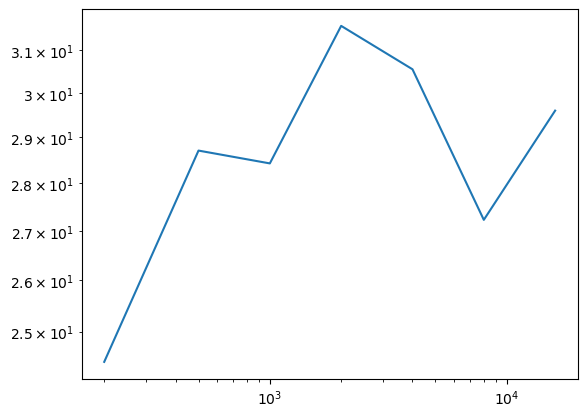

In [40]:
plt.loglog([200, 500, 1000, 2000, 4000, 8000, 16000], Accuracys)
plt.show()

***
## <font color='lightgreen'>Answer the following questions</font>
1. What accuracy did you recieve?
2. Plot the accuracy as a function of N for N = 200, 500, 1000, 2000, 4000, 8000, 16000 on a log-log scale. What happens to this accuracy as you change N (the size of your training subsample)? Explain your results.
3. When comparing SVM, Regression and K-NN (which we saw in the workshop tutorial): which model is the best classifier? Can you guess why?
4. Our model returns accuracy of about 30%. This is much better than random guessing, but still not human-level classification accuracy (which is nominally over 90%). Why do you think that is the case? Which aspect of the model is not "good enough"? Think about the type of classifier we used. <font color='red'>Extra credit (5 pt.):</font> what can you do to fix that?
***

בשיטה הזאת קיבלתי את הדיוק הגבוה ביותר. כ-30% דיוק.
המגמה אינה חדש משמעית כפי שאולי היינו מצפים. אמנם נראה כי באופן כללי ככל שהגדלתי את נתוני האימון, הדיוק גדל אך לא בצורה משמעותית ויש פעמים שהוא קטן אפילו. כלל הנראה הירידה בדיוק נובעת מהוספת רעש שמתרחשת כאשר מוסיפים עוד תמונות.
האלגוריתם הזה קיבל את התוצאות הטובות ביותר (בערך פי 3 יותר טוב משתי השיטות האחרות). אני חושב שלאלגוריתם הזה יש יותר מורכבות מתטמטית (לא לינארי) ולכן הוא מוביל לתוצאות טובות יותר.
למרות שבSVM אנחנו לא לגמרי במצב לינארי, עדיין האלגוריתם מתבסס בעיקרו על מסווג לינארי ולכן אנחנו לא מצליחים להגיע לזיהוי כמו זיהוי של מוח אנושי.
המוח שלנו אינו עובד בצורה לינארית ועל כן מצליח לעבד דברים שאינם לינארים.
בשביל לשפר את האלגוריתם ניתן להפעיל בתוכו פונקציות לא לינאריות שיאפשרו ליצור מודל מתמטי מורכב יותר. למשל פונקציית הסיגמואיד ניתן להפעיל בהמלך האימון למציאת המסווג ה"לינארי".
